# **Problem Set 5**

Daniel de Castro 

October 15, 2021

# Problem 1

## Part I

As stated in the problem, the LaGrange form of the interpolation polynomial takes the form $p(x) = \sum_{i = 0}^{n}y_i (\prod_{j \neq i} \frac{x - x_j}{x_i - x_j})$. Thus, 

$$p(x) = \sum_{i = 0}^{n}y_i (\prod_{j \neq i} \frac{x - x_j}{x_i - x_j})$$
$$p(x) = (76.0)(\prod_{j \neq 0} \frac{x - x_j}{-x_j}) + (105.7)(\prod_{j \neq 1} \frac{x - x_j}{20 - x_j}) + (131.7)(\prod_{j \neq 2} \frac{x - x_j}{40 - x_j})$$
$$p(x) = (76.0)(\frac{x - 20}{-20})(\frac{x - 40}{-40}) + (105.7)(\frac{x}{20})(\frac{x - 40}{-20}) + (131.7)(\frac{x}{40})(\frac{x - 20}{20})$$

## Part II

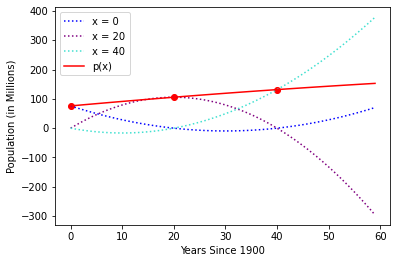

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define our domain 
fig, ax = plt.subplots()
x = np.arange(0, 60, 1)

# Define each phi(x) and p(x)
p_0 = 76.0 * (x - 20)/(-20) * (x - 40)/(-40)
p_1 = 105.7 * (x / 20) * (x - 40)/(-20)
p_2 = 131.7 * (x / 40) * (x - 20) / 20
p_x = 76.0 * (x - 20)/20 * (x - 40)/40 + 105.7 * x / 20 * (x - 40)/(-20) \
+ 131.7 * x / 40 * (x - 20) / 20

# Plot the individual points
ax.plot(0, 76.0, 'ro')
ax.plot(20, 105.7, 'ro')
ax.plot(40, 131.7, 'ro')

# Plot each polynomial
ax.plot(x, p_0, color="blue", marker=None, linestyle="dotted", label="x = 0")
ax.plot(x, p_1, color="purple", marker=None, linestyle="dotted", label="x = 20")
ax.plot(x, p_2, color="turquoise", marker=None, linestyle="dotted", \
        label="x = 40")
ax.plot(x, p_x, color="red", marker=None, linestyle="solid", label="p(x)")

# Label axes, and show the plot
ax.legend()
ax.set_xlabel("Years Since 1900")
ax.set_ylabel("Population (in Millions)")
plt.draw()

# Problem 2

The Newton form of the interpolation polynomial is given as $$p(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1)$$ for 3 data points ($n = 3$). Given that 

$$y_0 = a_0$$

$$y_1 = a_0 + a_1(x_1 - x_0)$$

$$y_2 = a_0 + a_1(x_2 - x_0) + a_2(x_2 - x_0)(x_2 - x_1)$$

we can set up the following system of equations:
$$M \vec{a} = \vec{y}$$

$$M = \begin{bmatrix} 1 & 0 & 0 \\ 1 & (20 - 0) & 0 \\ 1 & (40 - 0) & (40 - 0)(40 - 20) \end{bmatrix}$$

$$\vec{a} = \begin{bmatrix} a_0 \\ a_1 \\ a_2 \end{bmatrix}$$

$$\vec{y} = \begin{bmatrix} 76.0 \\ 105.7 \\ 131.7 \end{bmatrix}$$

We will now use the following code to solve this system. 

In [3]:
np.set_printoptions(suppress=True)

M = np.array([[1., 0., 0.],
              [1., 20., 0],
              [1., 40., 40.*20.]])
y = np.array([76., 105.7,131.7])

print(np.linalg.solve(M, y))

[76.        1.485    -0.004625]


Thus,

$$\vec{a} = \begin{bmatrix} 76.0 \\ 1.485 \\ -4.625 \cdot 10^{-3} \end{bmatrix}$$

We therefore find that 

$$p(x) = 76 + 1.485(x) + (-4.625 \cdot 10^{-3})(x)(x - 20)$$

Below, we plot this polynomial on top of that from Problem (1) to verify that they are the same. 

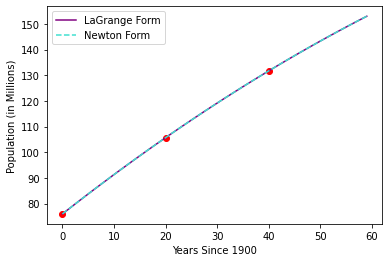

In [13]:
# Define our domain 
fig, ax = plt.subplots()
x = np.arange(0, 60, 1)

# Define each phi(x) and p(x)
p_1 = 76.0 * (x - 20)/20 * (x - 40)/40 + 105.7 * x / 20 * (x - 40)/(-20) \
+ 131.7 * x / 40 * (x - 20) / 20
p_2 = 76 + 1.485 * x + (-0.004625) * x * (x - 20)

# Plot the individual points
ax.plot(0, 76.0, 'ro')
ax.plot(20, 105.7, 'ro')
ax.plot(40, 131.7, 'ro')

# Plot each polynomial
ax.plot(x, p_1, color="purple", marker=None, linestyle="solid", \
        label="LaGrange Form")
ax.plot(x, p_2, color="turquoise", marker=None, linestyle="dashed", \
        label="Newton Form")

# Label axes, and show the plot
ax.legend()
ax.set_xlabel("Years Since 1900")
ax.set_ylabel("Population (in Millions)")
plt.draw()

# Problem 3

## Part I

Below, I use the `scipy.interpolate` package to find the LaGrange polynomial for the data points; this polynomial is of degree $n-1 = 5$. 

In [5]:
from scipy.interpolate import lagrange

x = np.arange(0,120,20)
y = np.array([76.,105.7,131.7,179.3,226.5,281.4])

poly = lagrange(x, y)
print("p(x) =")
print(poly)

p(x) =
           5             4            3          2
2.016e-07 x - 5.263e-05 x + 0.004827 x - 0.1711 x + 3.364 x + 76


As per the code above, 

$$p(x) = (2.016 \cdot 10^{-7}) x^5 - (5.263 \cdot 10^{-5}) + (0.004827)x^3 - (0.1711)x^2 + (3.364)x + 76$$

$p(x)$ is graphed, along with the data points, below. 

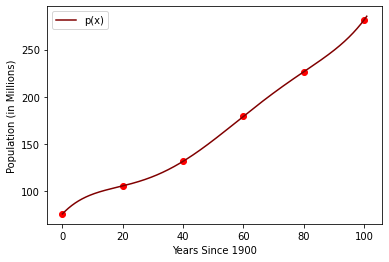

In [14]:
# Configure plot
fig, ax = plt.subplots()
x = np.arange(0, 101, 0.1)

# Plot the individual points
ax.plot([0,20,40,60,80,100], [76.,105.7,131.7,179.3,226.5,281.4], 'ro')

# Plot each polynomial
ax.plot(x, poly(x), color="maroon", marker=None, linestyle="solid", \
        label="p(x)")

# Label axes, and show the plot
ax.legend()
ax.set_xlabel("Years Since 1900")
ax.set_ylabel("Population (in Millions)")
plt.draw()

## Part II

To predict the population in 2020, we can find the value of $p(120)$. This is done in the code below. 

459.59999999998547


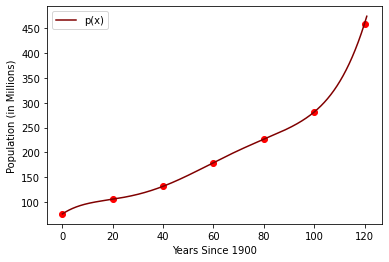

In [17]:
print(poly(120))

# Configure plot
fig, ax = plt.subplots()
x = np.arange(0, 121, 0.1)

# Plot the individual points
ax.plot([0,20,40,60,80,100,120], [76.,105.7,131.7,179.3,226.5,281.4,poly(120)],\
        'ro')

# Plot each polynomial
ax.plot(x, poly(x), color="maroon", marker=None, linestyle="solid", \
        label="p(x)")

# Label axes, and show the plot
ax.legend()
ax.set_xlabel("Years Since 1900")
ax.set_ylabel("Population (in Millions)")
plt.draw()

Using this polynomial, we predict the population in 2020 to be 459.6 million people. This, however, is an example of extrapolation, which can be dangerous. As the graph above demonstrates, the growth in the population between 2000 and 2020 predicted by the polynomial is extraordinarily large compared to the actual growth recorded over the other 20 year periods. Thus, extrapolating with this polynomial to find the population in the year 2020 has yielded a result that does not seem to make much sense and which does not follow the general trend for the years 1900-2000. 